<a href="https://colab.research.google.com/github/gunhokim-me/first-ML/blob/master/BasketBall_Player_Positionn_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# 데이터 수집
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [3]:
# 수집된 데이터 샘플 확인
df.head()

Player Pos   3P   2P  TRB  AST  STL  BLK
0    Alex Abrines  SG  1.4  0.6  1.3  0.6  0.5  0.1
1    Steven Adams   C  0.0  4.7  7.7  1.1  1.1  1.0
2   Alexis Ajinca   C  0.0  2.3  4.5  0.3  0.5  0.6
3  Chris Andersen   C  0.0  0.8  2.6  0.4  0.4  0.6
4     Will Barton  SG  1.5  3.5  4.3  3.4  0.8  0.5

In [4]:
# 현재 데이터에서 포지션의 개수를 확인
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [5]:
# 데이터 시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'STL and 2P in 2d plane')

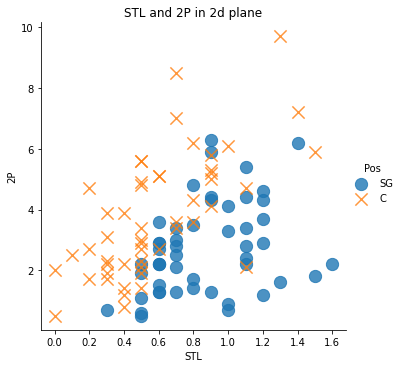

In [6]:
# 스틸, 2점슛 데이터 시각화
sns.lmplot(x = 'STL', y = '2P', data=df, fit_reg=False, # x축, y축 ,데이터, 노라인
           scatter_kws={'s':150}, #좌표 상의 점 크기
           markers=["o", "x"],
           hue="Pos" #예측값
           )

#타이틀
plt.title('STL and 2P in 2d plane')

# 2점슛, 어시스트, 스틸의 속성으로 데이터를 분포시킬 경우 슈팅가드와 센터의 경계가 너무 근접해서 분류하기에는 모호하다. => 좋은 분류방법이 아니라는 뜻.

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

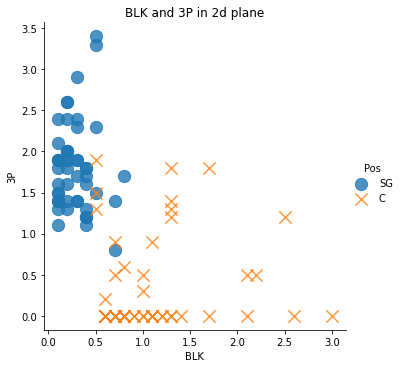

In [7]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot(x = 'BLK', y = '3P', data=df, fit_reg=False, # x축, y축 ,데이터, 노라인
           scatter_kws={'s':150}, #좌표 상의 점 크기
           markers=["o", "x"],
           hue="Pos" #예측값
           )

#타이틀
plt.title('BLK and 3P in 2d plane')

# 3점슛, 블로킹, 리바운드의 속성으로 데이터를 분포시킬 경우 같은 분류끼리는 근접하고, 다른 분류와는 떨어져 있기 때문에 데이터 구분이 확실하다.

In [8]:
# 데이터 다듬기
# 분별력 없는 특징(feature) 을 데이터에서 제거
df.drop(['2P','AST','STL'], axis=1, inplace=True)

#제거 후 데이터 조회
df.head()

Player Pos   3P  TRB  BLK
0    Alex Abrines  SG  1.4  1.3  0.1
1    Steven Adams   C  0.0  7.7  1.0
2   Alexis Ajinca   C  0.0  4.5  0.6
3  Chris Andersen   C  0.0  2.6  0.6
4     Will Barton  SG  1.5  4.3  0.5

In [9]:
#데이터 나누기
#사이킷런의 train_test_split을 사용하면 코드 한줄로 손쉽게 데이터를 나눌수 있음
from sklearn.model_selection import train_test_split

In [10]:
#다듬어진 데이터에서 20%를 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

In [14]:
# 학습 데이터, 테스트 데이터 개수 확인
train.shape[0]
test.shape[0]

20

In [ ]:
#최적의 kNN 파라미터 찾기
#kNN 조절가능한 변수는 이웃의 개수(k)만 가능 -> 따라서, 예측값이 가장 높은 최적의 k를 찾는 것은 kNN알고리즘에서 가장 매우 중요한 단계
#검증 데이터를 사용해서 가장 예측율이 높은 k를 찾는다.

#corss_val_score를 사용하면 쉽게 kNN 모델의 교차 검증을 수행할 수 있음.
#이번에 사용되는 교차 검증은 k-fold 교차 검증

In [15]:
#kNN 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0]
k_list = []
for i in range(3, max_k_range, 2):
  k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

#교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
  cross_validation_scores.append(scores.mean())

cross_validation_scores

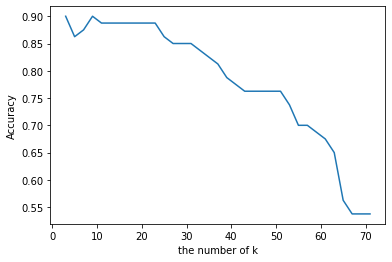

In [17]:
#k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [18]:
#가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The Best number is  :  " + str(k))

The Best number is  :  3


In [19]:
#모델 테스트
#라이브러리 임포트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

#학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
#선수 포지션을 예측 할 값으로 지정
y_train = train[['Pos']]

#kNN 모델 학습
knn.fit(x_train, y_train.values.ravel())

#테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]
#선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

#테스트 시작
pred = knn.predict(x_test)

#모델 예측 정확도 출력
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))


accuracy : 0.95


In [21]:
#실제값과 에측값을 비교하는 차트 출력
comparison = pd.DataFrame({'ground_truth':y_test.values.ravel(), 'prediction' :pred})
comparison

ground_truth prediction
0            SG         SG
1             C          C
2             C          C
3            SG          C
4             C          C
5             C          C
6             C          C
7             C          C
8             C          C
9            SG         SG
10            C          C
11           SG         SG
12           SG         SG
13            C          C
14           SG         SG
15            C          C
16           SG         SG
17            C          C
18            C          C
19            C          C